## **[2024년 1학기 로봇공학] Ch. 3-a. 2D Rigid-body Motions**

- 작성자 : 서울시립대학교 전자전기컴퓨터공학부 박경훈 교수(gyunghoon.park@uos.ac.kr)
- 작성일 : 2024. 3. 26.

이번 예제에서는 2차원 상의 강체 움직임을 서술하는 다양한 개념들을 익혀보고자 합니다.
- Peter Corke 교수님이 작성한 [Spatial Math Toolbox for Python](https://github.com/bdaiinstitute/spatialmath-python)과 [Robotics Toolbox for Python](https://petercorke.github.io/robotics-toolbox-python/index.html)을 기반으로 진행합니다.
- 이번 예제의 대부분의 내용은 Peter Corke, Robotics, Vision and Control: Fundamental Algorithms in Python (3\E), Springer를 참고하여 제작하였습니다.

In [1]:
import spatialmath as sm
import roboticstoolbox as rtb
import numpy as np
from spatialmath.base import *
from math import *
from scipy import *

### **Topic 1 : 2D Rotation Matrix**

2D rotation matrix인 $R = \begin{bmatrix}
\cos (\pi/6) & - \sin(\pi/6)\\
\sin (\pi/6) & \cos (\pi/6)
\end{bmatrix}\in \rm {SO}(2)$는 rot2 함수를 이용하여 아래와 같이 불러올 수 있습니다.

In [2]:
R1 = rot2(pi/6)
print(R1)

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


Robotics Toolbox에서는 2차원 상에서 rotation matrix 혹은 homogeneous transformation으로 정의된 frame을 그리는 trplot2()라는 함수를 제공합니다.

<Axes: xlabel='X', ylabel='Y'>

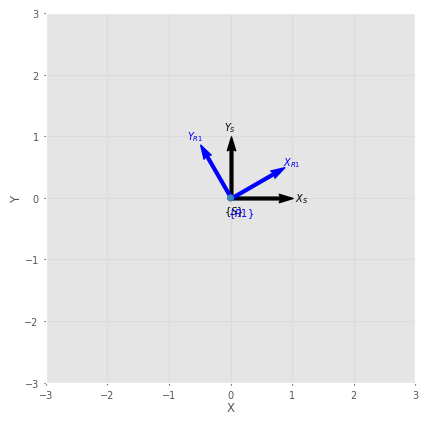

In [3]:
plotvol2([-3, 3]); 
S = rot2(0)
trplot2(S, frame="S", color="k")
trplot2(R1, frame="R1", color="b")

교재에 따르면 rotation matrix $R_1\in {\rm SO}(2)$은 $e^{L_1}$의 형태로 표현 가능합니다.\
여기서 $L_1$은 ${\rm so}(2)$에 속하는 $2\times 2$ 행렬이며, matrix logarithm 연산자인 logm을 이용하여 아래와 같이 계산할 수 있습니다.

In [4]:
L1 = linalg.logm(R1)
print("Log of R1 :\n", L1)

Log of R1 :
 [[-7.65187093e-17 -5.23598776e-01]
 [ 5.23598776e-01 -4.83813810e-17]]


위에서 구한 $L_1$는 skew-symmetric 행렬로, $L_1 = \begin{bmatrix} 0 & -\theta_1 \\ \theta_1 & 0\end{bmatrix}$의 형태로 표현 가능합니다.\
이를 구성하는 $\theta_1\in \mathbb{R}^1$은 vex 함수를 이용하여 다음과 같이 얻습니다.

In [5]:
theta1 = vex(L1)
print("theta1 = \n", theta1)

theta1 = 
 [0.52359878]


즉, $R_1 = e^{[\theta_1]}$으로 표현할 수 있습니다.\
이는 아래 연산을 통해 확인 가능합니다.

In [6]:
R2 = linalg.expm(skew(theta1))
print("Original rotation matrix : \n", R1)
print("Recomputed rotation matrix : \n", R2)

Original rotation matrix : 
 [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
Recomputed rotation matrix : 
 [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


### **Topic 2 : 2D Homogeneous Transformation**

2차원 상의 강체 움직임은 2D homogeneous transformation $T = \begin{bmatrix}
R & p\\
0 & 1
\end{bmatrix} \in {\rm SE}(2)$으로 표현할 수 있습니다.\
여기서 $R$은 2D rotation matrix, $p$는 2D translation vector를 의미합니다.

기본적으로 2D Homogeneous transformation은 rotation을 의미하는 `trot2`와 translation을 의미하는 `transl2` 함수를 적절히 조합하여 얻을 수 있습니다.
- *trot2($\theta$)* : $\theta$만큼의 회전을 의미하는 $T = \begin{bmatrix} {\rm Rot}(\hat{\rm z},\theta) & 0\\ 0 & 1 \end{bmatrix}$를 출력합니다.
- *transl2($p_x,p_y$)* : $p = \begin{bmatrix} p_x\\p_y \end{bmatrix}$만큼의 직선 운동을 의미하는 $T = \begin{bmatrix} I & p\\ 0 & 1 \end{bmatrix}$를 출력합니다.

예시로 Topic 1에서 살펴본 rotation matrix $R_1$과 동일한 회전을 의미하는 homogeneous transformation $T_1$은 아래와 같이 선언할 수 있습니다.

In [7]:
T1 = trot2(pi/6)
print(T1)

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


trplot2를 이용하여 그려보면 다음과 같습니다.

<Axes: xlabel='X', ylabel='Y'>

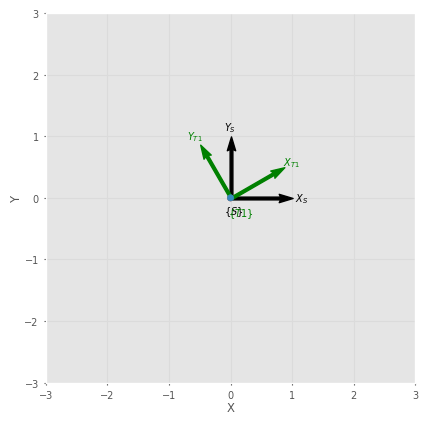

In [8]:
plotvol2([-3, 3]); 
trplot2(S, frame="S", color="k")
trplot2(T1, frame="T1", color="g")

이제 translation과 rotation을 순서대로 수행한 결과인 $T_2$를 다음과 같이 계산하고, 위에서 얻은 $T_1$과 비교해봅시다.\
(Robotics Toolbox에서 2개의 homogeneous transformation 간의 연산은 "$@$''을 사용합니다.)

<Axes: xlabel='X', ylabel='Y'>

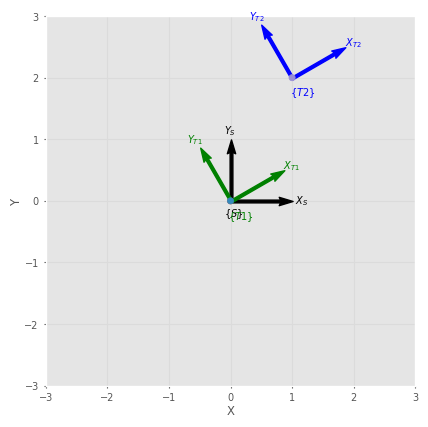

In [9]:
T2 = transl2(1,2) @ T1
plotvol2([-3, 3])
trplot2(S, frame="S", color="k")
trplot2(T1, frame="T1", color="g")
trplot2(T2, frame="T2", color="b")

이제 두 homogeneous transformation을 곱하는 순서가 어떤 의미를 주는지를 예제를 통해 확인해봅시다.\
위에서 구한 $T_2$에, ${\rm Trans}\big(\begin{bmatrix}1\\2\end{bmatrix}\big)$을 $T_2$의 앞 혹은 뒤에 곱하고자 합니다. 
- (*Post-multiplication*) $T_3 = T_2 \cdot {\rm Trans}\big(\begin{bmatrix}1\\2\end{bmatrix}\big)$: Body frame $\{T_2\}$를 기준으로 $\{T_2\}$를 $p = \begin{bmatrix}1\\2\end{bmatrix}$만큼 translation시킨 결과입니다. 
- (*Pre-multiplication*) $T_4 = {\rm Trans}\big(\begin{bmatrix}1\\2\end{bmatrix}\big) \cdot T_2$: Space frame $\{S\}$를 기준으로 $\{T_2\}$를 $p = \begin{bmatrix}1\\2\end{bmatrix}$만큼 translation시킨 결과입니다. 

아래 코드를 구동하여서 이 둘을 비교해봅시다.

<Axes: xlabel='X', ylabel='Y'>

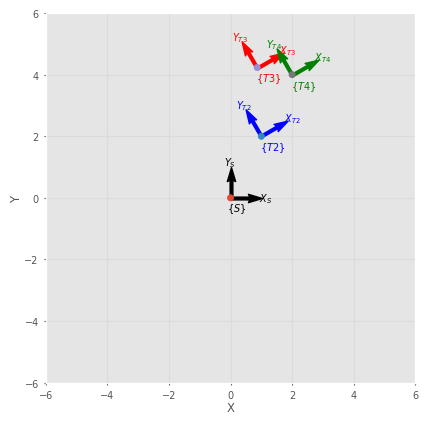

In [10]:
T3 = T2 @ transl2(1,2)
T4 = transl2(1,2) @ T2
plotvol2([-6, 6])
trplot2(S, frame="S", color="k")
trplot2(T2, frame="T2", color="b")
trplot2(T3, frame="T3", color="r")
trplot2(T4, frame="T4", color="g")

위의 내용을 조금 더 살펴보기 위해, $p = \begin{bmatrix} 2\\ 0\end{bmatrix}$을 이용하여 정의된 $X_0 = {\rm Trans}(p)$를 $\pi/6$만큼 회전시키면서 그려보도록 합시다.\
먼저 ${\rm trot2}(\pi/6\times {\rm idx})$를 pre-multiplication시킨 결과인 frame들을 그리면 다음과 같습니다. 

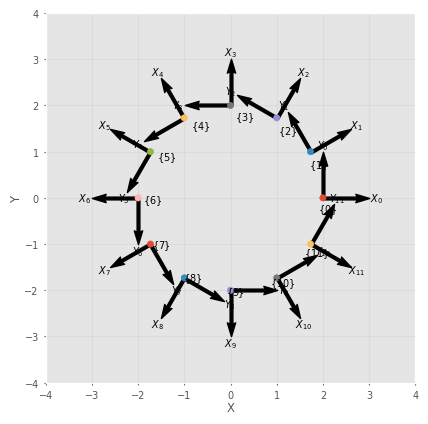

In [11]:
X0 = transl2(2,0)
for idx in range(0,12):
    T = trot2(pi/6*idx) @ X0
    plotvol2([-4, 4])
    trplot2(T, frame = str(idx), color='k')

위 작업의 결과물인 frame들은, 원점을 중심으로 $\pi/6$만큼 회전하면서 계산되는 것을 확인할 수 있습니다.

이제 동일한 작업을 post-multiplication으로 바꾸어 수행하면 아래의 결과를 얻습니다.

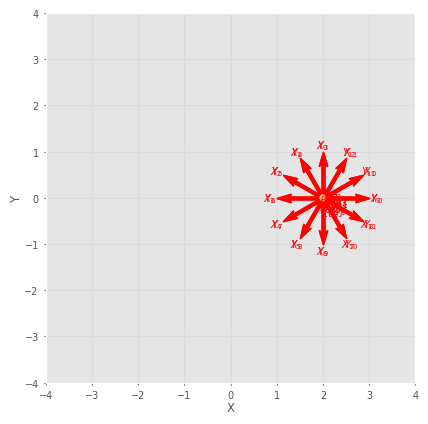

In [12]:
for idx in range(0,12):
    T = X0 @ trot2(pi/6*idx)
    plotvol2([-4, 4])
    trplot2(T, frame = str(idx), color='r')

위 결과는 pre-multiplication과는 다르게, body frame인 $\{X_0\}$를 기준으로 회전이 발생함을 보여줍니다.

### **Topic 3 : 2D Twist and Screw**

지금부터는 2차원 공간 상에서 강체의 움직임을 표현하는 또 다른 방식인 screw theory에서 핵심적인 역할을 하는 twist와 screw에 대해 살펴보겠습니다.\
Space frame에 rotation과 translation을 각각 1차례 수행하여 얻어진 다음의 homogeneous transformation을 생각해봅시다. 

In [13]:
T = trot2(pi/6) @ transl2(1,2)
print(T)

[[ 0.8660254  -0.5        -0.1339746 ]
 [ 0.5         0.8660254   2.23205081]
 [ 0.          0.          1.        ]]


<Axes: xlabel='X', ylabel='Y'>

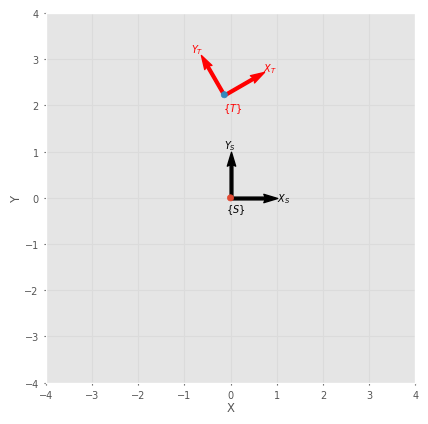

In [14]:
plotvol2([-4, 4])
trplot2(S, frame="S", color="k")
trplot2(T, frame="T", color="r")

Topic 1과 유사한 작업을 통해 $T = e^{L}$로 표현하는 $3\times 3$ 행렬 $L$을 다음과 같이 구할 수 있습니다. 

In [15]:
L = linalg.logm(T)
print(L)

[[-7.65187093e-17 -5.23598776e-01  4.53449841e-01]
 [ 5.23598776e-01 -4.83813810e-17  2.21589662e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


이때 얻어지는 $L$은 마지막 행(row)이 0인 구조를 가지고 있습니다.\
이렇게 얻은 $L$에 skew-symmetric operation $[\cdot]$의 역(inverse)를 계산하는 vexa() 함수를 적용하면 다음을 얻습니다.

In [16]:
V1 = vexa(L)
print(V1)

[0.45344984 2.21589662 0.52359878]


이렇게 얻은 $\mathcal{V}$는 $T = e^{L} = e^{[\mathcal{V}]}$를 만족하는 2D twist입니다.\
교재와는 달리 위의 V1은 $\mathcal{V}=\begin{bmatrix} v\\ \omega \end{bmatrix}$의 순서로 작성되어 있으며, 여기서 선속도와 각속도에 해당하는 $v$와 $\omega$는 각각 $\mathbb{R}^2$와 $\mathbb{R}^1$의 벡터입니다. 

아래와 같이 Spatial Math Toolbox에서 제공하는 Twist2() 함수를 이용하여 2D twist 객체로 인식시킬 수도 있습니다.  

In [17]:
V2 = sm.Twist2(T)
print(V2)
print('Twist V2의 linear velocity : ', V2.v)
print('Twist V2의 angular velocity : ', V2.w)
print('Twist V2의 center of rotation : ', V2.pole)

(0.45345 2.2159; 0.5236)
Twist V2의 linear velocity :  [0.45344984 2.21589662]
Twist V2의 angular velocity :  0.5235987755982987
Twist V2의 center of rotation :  [-2.21589662  0.45344984]


여기서 V2의 center of rotation은, $\{S\}$ frame으로부터 $\{ T \}$ frame으로 강체가 이동하는 것을 screw motion으로써 표현할 때 screw의 회전축의 위치를 의미합니다.

[[<matplotlib.lines.Line2D at 0x14151db2630>]]

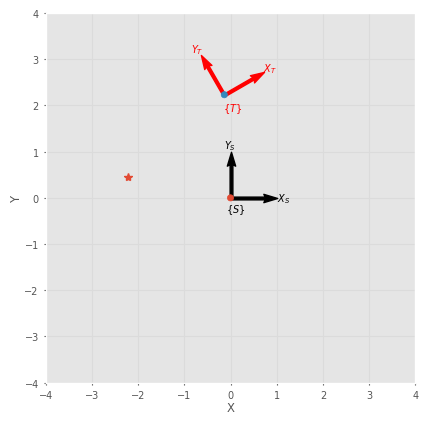

In [18]:
plotvol2([-4, 4])
trplot2(S, frame="S", color="k")
trplot2(T, frame="T", color="r")
plot_point(V2.pole, '*')

Screw axis $\mathcal{S}$는 twist의 일종으로, 각속도 혹은 선속도 벡터의 크기가 $1$로 normalize된 벡터입니다.\
Toolbox에서는 Twist2.UnitRevolute() 함수를 통해 생성할 수 있으며, 이때 UnitRevolute 함수의 입력 인자는 screw motion의 회전축 위치입니다. 

In [19]:
S2 = sm.Twist2.UnitRevolute(V2.pole) # 2D Screw
print(S2)

(0.45345 2.2159; 1)


위에서 구한 screw axis $\mathcal{S}_2$는 $T = e^{[\mathcal{S}_2]\theta}$의 형태로 $T$를 표현할 수 있습니다.\
또한 $\mathcal{V}_2$와 동일한 선속도 벡터를 가지지만 각속도 벡터는 크기가 $1$로 normalized되어 있습니다.

이제 아래와 같이 $\mathcal{S}_2$의 screw 중심으로부터, $\{ S\}$ frame을 다양한 $\theta$로 회전시키는 작업을 수행해봅시다.

[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


[[<matplotlib.lines.Line2D at 0x14151fce3c0>]]

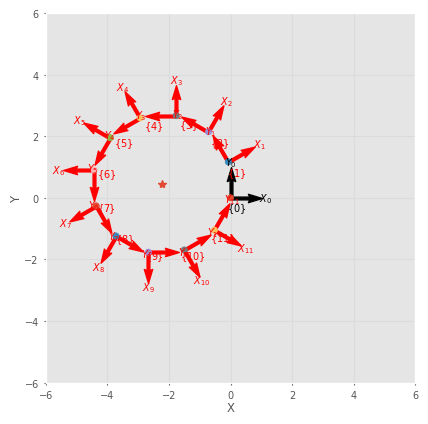

In [20]:
S = trot2(0)
trplot2(S, frame = '0', color='k')
print(S)

for idx in range(1,12):
    Ti = S2.exp(pi/6 * idx)
    T2 = Ti.A @ S
    plotvol2([-6, 6])
    trplot2(T2, frame = str(idx), color='r')

plot_point(S2.pole, '*')